#  <center> <font style="color:rgb(100,109,254)"> Image Inpainting </font> </center>

Image Inpainting is used to restore Images that have been damaged meaning they have noticeable spots, noise, strokes etc. There are several approaches in computer vision to solve this, State of the Art approaches are based on Deep learning but today we're going to focus on classical methods that are also really effective.

Consider all the degraded photos at your home's with black spots, some strokes etc on it. Those images can be restored with Image Inpainting, You first scan the image and then apply an Image Inpainting algorithm on it. The basic principle is simple replace corrupted parts of the image with the neighboring pixels so it looks normal. The corrupted parts are highlighted by using a binary mask in which the white part indicates the corrupted parts, and the black is left as it is. 

**A typical example of Image Inpainting:**

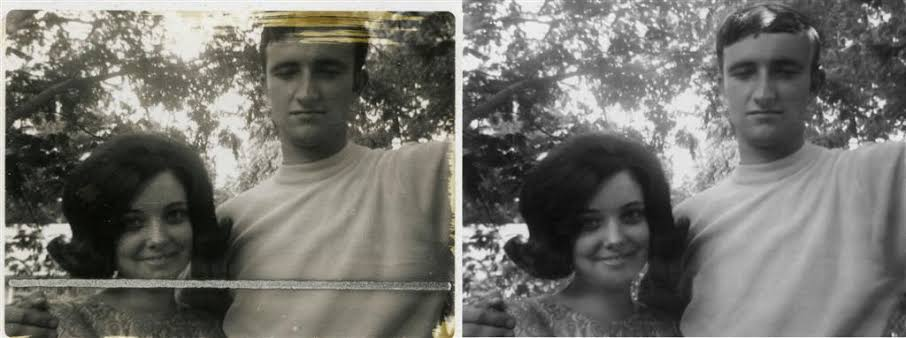

Now there are several algorithms which determine how pixels are approximated based on neighborhood. OpenCV provides two of them. Both can be accessed by the same function, `cv2.inpaint()`

## <font style="color:rgb(134,19,348)"> Inpaint Telea </font>
First algorithm is based on the paper "*An Image Inpainting Technique Based on the Fast Marching Method*" by **Alexandru Telea** in **2004**. It is based on `Fast Marching Method`(a numerical method created for solving boundary value problems). 

Consider a region in the image to be inpainted. Algorithm starts from the boundary of this region and goes inside the region gradually filling everything in the boundary first. It takes a small neighbourhood around the pixel on the neighbourhood to be inpainted. This pixel is replaced by normalized weighted sum of all the known pixels in the neighbourhood. Selection of the weights is an important matter. More weightage is given to those pixels lying near to the point, near to the normal of the boundary and those lying on the boundary contours. Once a pixel is inpainted, it moves to next nearest pixel using `Fast Marching Method`. `FMM` ensures those pixels near the known pixels are inpainted first, so that it just works like a manual heuristic operation. This algorithm is enabled by using the flag, **`cv2.INPAINT_TELEA`**

##  <font style="color:rgb(134,19,348)"> Inpaint Navier-Stokes </font>
If you have studied Fluid Dynamics in College then you possibly have worked  with **Navier Stokes** equation, the second method is based on it. The method was published in 2001 in a paper titled **[Navier-Stokes, Fluid Dynamics, and Image and Video Inpainting.](https://www.math.ucla.edu/~bertozzi/papers/cvpr01.pdf)**

**Now consider this picture:**

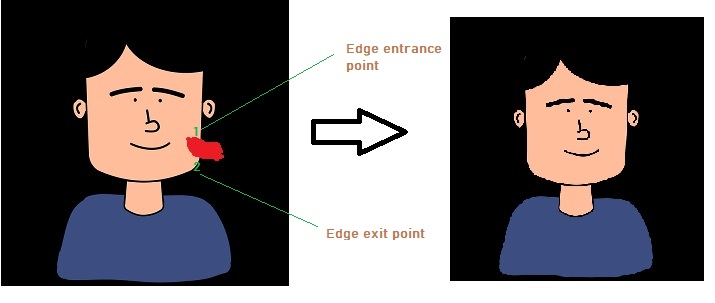

If we wanted to get rid of the red mark, we would have to fill it up using the neighboring pixels, to properly fill this red blob `point 1` (Edge entering point) need to continue on and connect to `point 2` (Edge exit point). This essentially means if we need to properly fill up then we need to preserve gradients (edges,corners etc). The second thing that need to happen is that right part of the connection should be black and the left part should be skin colored, so this can happen if color information is correctly propagated in smoother regions (smoothness is determined by Laplacian information). Now this algorithm utilizes partial differential equations to modify the image intensity values inside the defined region keeping the above requirements in mind. 

### <font style="color:rgb(134,19,348)"> Image Inpainting Resources: </font>
- [Opencv Tutorial](https://docs.opencv.org/4.1.0/df/d3d/tutorial_py_inpainting.html)
- [LearnOpencv Tutorial](https://www.learnopencv.com/image-inpainting-with-opencv-c-python/)
- [Inpainting in Wikipedia](https://en.wikipedia.org/wiki/Inpainting)


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style="color:rgb(134,19,348)"> Image Inpainting In Opencv </font>

[```dst	 =	cv2.inpaint(	src, inpaintMask, inpaintRadius, flags)```](https://docs.opencv.org/4.2.0/d7/d8b/group__photo__inpaint.html#gaedd30dfa0214fec4c88138b51d678085)

- **`src`**	 Input 8-bit, 16-bit unsigned or 32-bit float 1-channel or 8-bit 3-channel image.
- **`inpaintMask`**	Inpainting mask, 8-bit 1-channel image. Non-zero pixels indicate the area that needs to be inpainted.
- **`inpaintRadius`** Radius of a circular neighborhood of each point inpainted that is considered by the algorithm.
- **`flags`**	Inpainting method that could be cv2.INPAINT_NS or cv2.INPAINT_TELEA

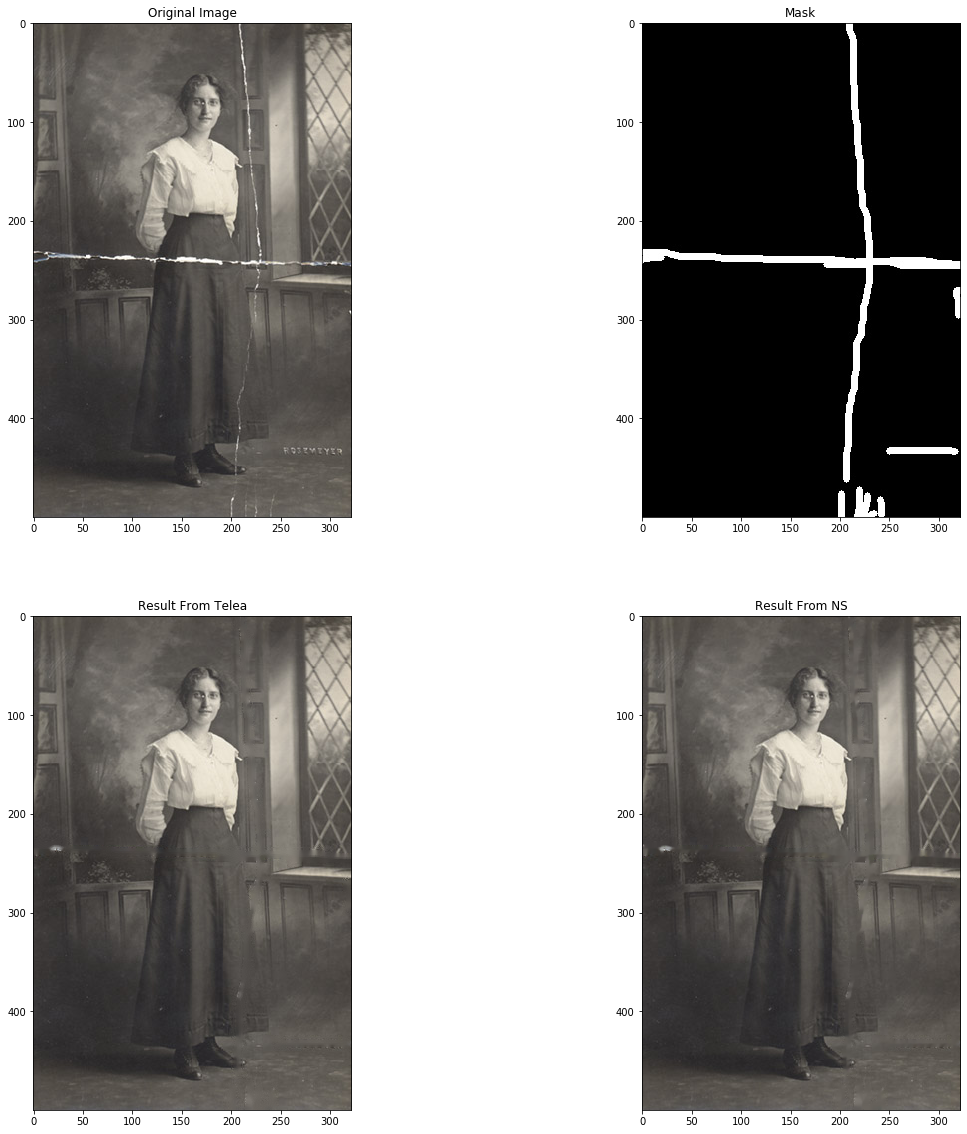

In [3]:
img = cv2.imread('media/M4/teared3.jpg')
mask = cv2.imread('media/M4/maskteared3.jpg',0)

result_telea = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
result_ns = cv2.inpaint(img,mask,3,cv2.INPAINT_NS)


plt.figure(figsize=[20,20])
plt.subplot(221);plt.imshow(img[:,:,::-1]);plt.title("Original Image")
plt.subplot(222);plt.imshow(mask, cmap = 'gray');plt.title('Mask')
plt.subplot(223);plt.imshow(result_telea[:,:,::-1]);plt.title('Result From Telea')
plt.subplot(224);plt.imshow(result_ns[:,:,::-1]);plt.title('Result From NS');

## <font style="color:rgb(134,19,348)"> Make The Mask For Inpainting </font>
The mask that we have used above can be either made in a photo editing application like Photoshop or you can use the below script to generate the mask, press `p` to save the mask after drawing.

In [4]:
# This is our toggle variable , it will be false initially
drawing= False

# creating a named window to attach the mouse callback function.
cv2.namedWindow('image')

# Initilizing the x1,y1 and x2,y2 variables, these will be used to draw the line.
# x1 is None whenever there is no previous x1,y1 points which is true initially.
x1 =None
x2 =0
y1 =0
y2=0

# This function toggles drawing variable to True or False depending upon if the mouse is pressed or not
# It also stores the mouse's coordinates in x2,y2 variables as the mouse moves.
def draw_line(event,x,y,flags,param):
    global  x2, y2,drawing

    if event == cv2.EVENT_MOUSEMOVE:
        x2 = x
        y2 = y       

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# set some custom width and height
width = 1000
height = 600

# create a black image.
img = np.zeros((height,width,3), np.uint8)

basename='media/M4/'
imgname='teared3.jpg'        
img = cv2.imread(basename+imgname)
imgmask = np.zeros(img.shape, np.uint8)

# Attach the window and the function to the mouse call back funtion
cv2.setMouseCallback('image',draw_line)

while True:
    
    # Only draw if drawing is true
    if drawing:
        
        # x1 is not None means we have some previous x1,y1 points which we can use to draw on the image.
        if x1 is not None:                  
            img = cv2.line(img, (x1,y1),(x2,y2), [255,255,255], 5)
            imgmask = cv2.line(imgmask, (x1,y1),(x2,y2), [255,255,255], 5)

            # When we are done drawing the line then the x2,y2 becomes x1,y1 for the next line.
            x1= x2
            y1 = y2
            
        else:
            # If there was no x1,y1 available (which means either the mouse was pressed up or this is the first run of the 
            # program) then we want to initilize them as x2,y2
            x1,y1 = x2,y2
   
    else:
        # x1 is made None if the mouse is up.
        x1 = None

    cv2.imshow('image',img)

    k = cv2.waitKey(1)
    
    if k  == ord('c'):
        img = cv2.imread(imgname)
        imgmask = np.zeros(img.shape, np.uint8)
        
    elif k  == ord('p'):
        cv2.imwrite(basename +'mask' +imgname,imgmask)
        break        

    elif k  == 27:
        break
                
cv2.destroyAllWindows()

## <font style="color:rgb(134,19,348)"> Automated Image Inpainting </font>
Now the best results are directly linked to how good of a mask you make, so you might wonder why bother with writing code when you're still manually outlining the area to be modified. You'd be better off using Photoshop 🤔. Well think again, There are cases in which you can automate that outlining of the mask, like in the below example where you can get the mask with just simple thresholding 😉, granted not all examples are this easy but with clever image processing techniques you can skip the labeling/outlining process on many examples.

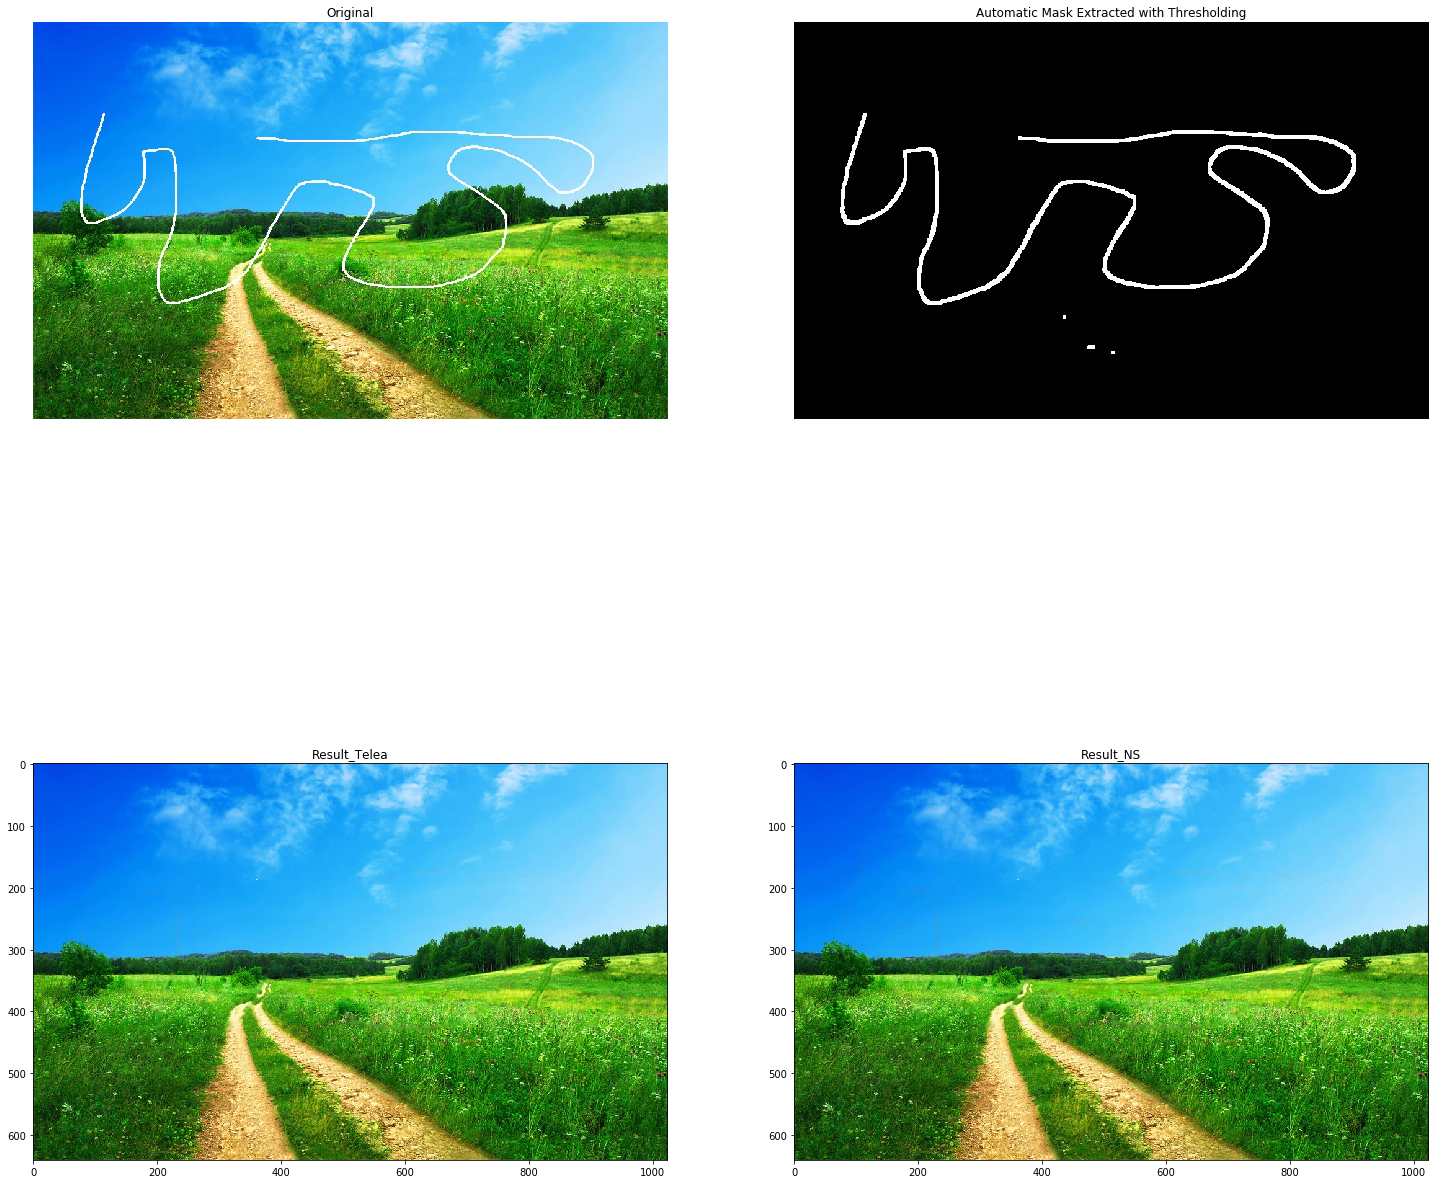

In [5]:
image = cv2.imread('media/M4/scene.jpg')
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# As simple as that you have a mask
ret, mask = cv2.threshold(gray_img, 250, 255, cv2.THRESH_BINARY)
mask = cv2.dilate(mask,None,iterations=2)

result_telea = cv2.inpaint(image,mask,3,cv2.INPAINT_TELEA)
result_ns = cv2.inpaint(image,mask,3,cv2.INPAINT_NS)


plt.figure(figsize=[25,25])
plt.subplot(221);plt.imshow(image[:,:,::-1]);plt.title("Original");plt.axis('off');
plt.subplot(222);plt.imshow(mask ,cmap='gray');plt.title("Automatic Mask Extracted with Thresholding");plt.axis('off');
plt.subplot(223);plt.imshow(result_telea[:,:,::-1]);plt.title("Result_Telea")
plt.subplot(224);plt.imshow(result_ns[:,:,::-1]);plt.title("Result_NS");

###  <font style="color:rgb(34,169,134)"> Assignment: Apply Image inpainting</font>
In this assignment you should apply image inpainting to your own corrupted image, you can choose any corrupted image you want.

In [ ]:
### ADD CODE HERE
